In [30]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.metrics
from sklearn.metrics import mean_squared_error
from scipy import stats

import statsmodels.api as sa
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
data=pd.read_csv('for_train.csv', index_col=0) 
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Customer ID,,,,,,,,,,,,,,,,,,,,,
70172,1,0,13,1,2,460,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
5047,1,1,25,0,0,235,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
110028,0,0,26,0,0,1142,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
24026,0,0,25,0,0,562,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
119299,1,0,61,0,0,214,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1


In [3]:
X = data.iloc[:, :-1]
y = data[['satisfaction']]


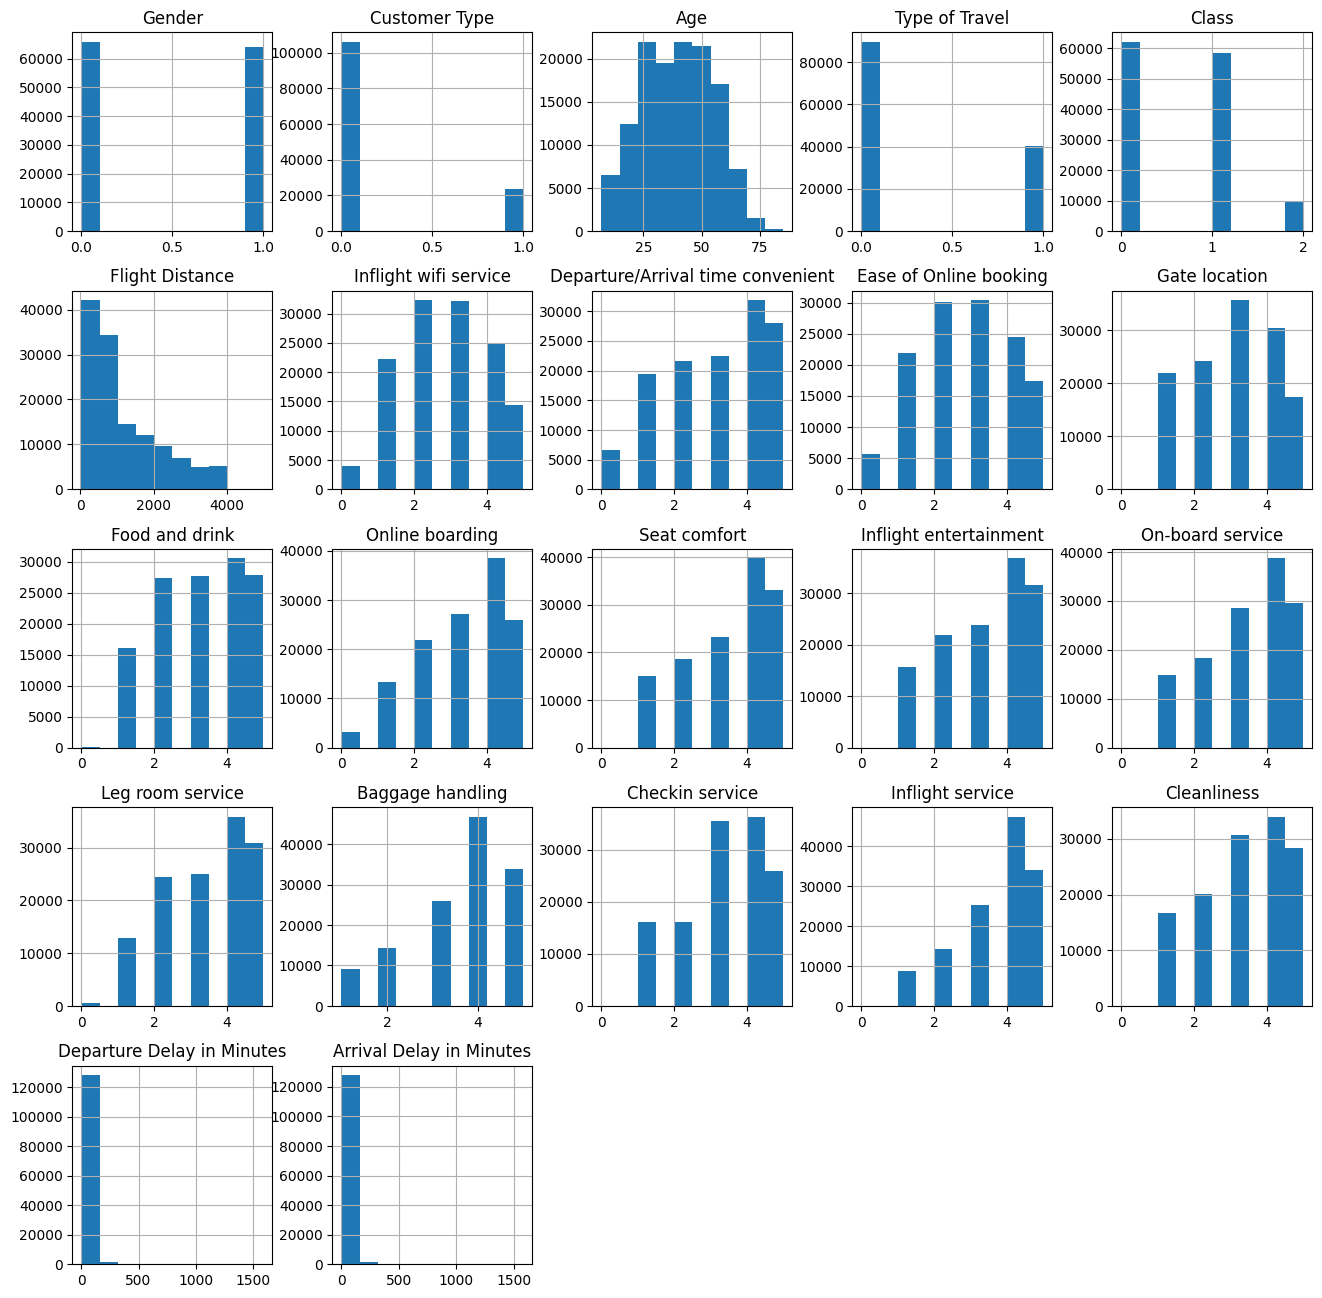

In [4]:
#Apply a power transform featurewise to make data more Gaussian-like
#Let us use min max scaler estimator for our data now

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
# split training and testing data
X_train,X_test,y_train,y_test= train_test_split(
                                            X, y,
                                            test_size=0.3,
                                            random_state=42
                                           )
minmax= MinMaxScaler()
Fit_Transform = minmax.fit_transform(X_train)
Fit_Transform
X.hist(figsize=(16,16))
plt.show()

In [5]:
#n_estimators — quantity of trees in forest, let us set 200
#max_depth— maximal depth of tree, do not set any limit
#min_samples_split— minimal quantity of data points before dats separate - do not settle
#min_samples_leaf — do not settle
#bootstrap— true of false choose - do not settle
#random_state — generate random numerals for randon forest - set 0 

In [6]:
# create regressor object, set n_estimators = 200 as after try =100 Accuracy was less a little
regressor = RandomForestRegressor(n_estimators=200, random_state=0)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# fit the regressor with x and y data
regressor.fit(X_train, y_train)
print('Regressor Accuracy:', regressor.score(X_train, y_train))

Regressor Accuracy: 0.9843432559183554


In [7]:
regressor.fit(X_test, y_test)
print('Regressor Accuracy:', regressor.score(X_test, y_test))

Regressor Accuracy: 0.9825885926694042


In [8]:
# We can see that RandomForestRegressor gives good resilts for train and test data, let us check other metrics:

In [9]:
#from sklearn.metrics import roc_auc_score
# for future - (X_train, y_train) - learning, (X_test, y_test) - control
# model is regressor
model =  RandomForestRegressor(n_estimators=200 ,
                               oob_score=True,
                               random_state=1)
model.fit(X_train, y_train) # learning
prediction = model.predict(X_test) # prediction

print ("AUC-ROC (train) = ", roc_auc_score(y_train, model.oob_prediction_))
print ("AUC-ROC (oob - quality of algoritm) = ", roc_auc_score(y_test, prediction))

AUC-ROC (train) =  0.9936850538548503
AUC-ROC (oob - quality of algoritm) =  0.9938152460487512


In [10]:
print(prediction)
print(prediction.shape)

[0.   1.   0.02 ... 0.04 0.   0.  ]
(38964,)


In [11]:
#from sklearn.metrics import mean_absolute_percentage_error as mape
#from sklearn import metrics

In [12]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, prediction), 1))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, prediction), 1))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, prediction)), 1))
print("(R^2) Score:", round(metrics.r2_score(y_test, prediction), 1))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')


Mean Absolute Error: 0.1
Mean Squared Error: 0.0
Root Mean Squared Error: 0.2
(R^2) Score: 0.9
Train Score : 98.44% and Test Score : 88.64% using Random Tree Regressor.


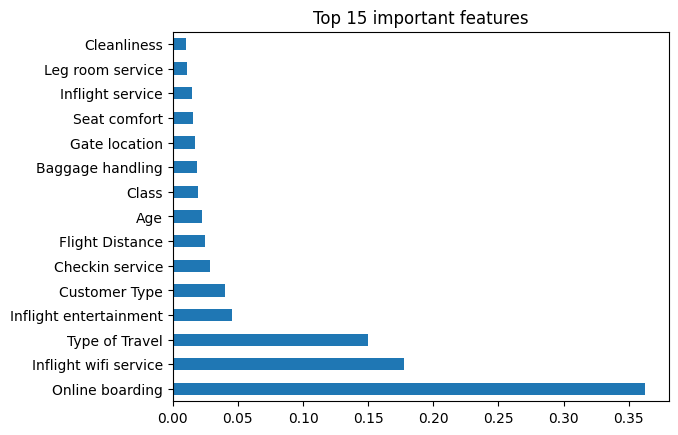

In [13]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()


In [14]:
for i,v in enumerate(feat_importances):
    print('Feature: {}  Score: {}' .format(i,v))

Feature: 0  Score: 0.002364209087158228
Feature: 1  Score: 0.04036632116062548
Feature: 2  Score: 0.02268301430515816
Feature: 3  Score: 0.1500605673743889
Feature: 4  Score: 0.01919188530569416
Feature: 5  Score: 0.024783441948494692
Feature: 6  Score: 0.1774453088683624
Feature: 7  Score: 0.005913542143876074
Feature: 8  Score: 0.003335639939754329
Feature: 9  Score: 0.01729009122485237
Feature: 10  Score: 0.004206287160209325
Feature: 11  Score: 0.3625170461891218
Feature: 12  Score: 0.015533954154547391
Feature: 13  Score: 0.04563514757240776
Feature: 14  Score: 0.00881573756683226
Feature: 15  Score: 0.010979461647511093
Feature: 16  Score: 0.018600498621320186
Feature: 17  Score: 0.028704036271215014
Feature: 18  Score: 0.014570824738246266
Feature: 19  Score: 0.01006669102707634
Feature: 20  Score: 0.007409235419975314
Feature: 21  Score: 0.00952705827317246


In [15]:
#Feature importance gives us interpretability of data.
#We see that online boarding is the most important for passengers satisfaction 
#Also flight company can improve wifi service and inflight interyament for better results
#Type of travel matters

In [16]:
classifier = rfc(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,
class_weight=None)
    

In [17]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
#from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)
#We can see that false negative (1033=2.65%) and false positive (436=1.12%) quantity is normal compare to total
#For better vision let us heatmat to see:

Confusion Matrix

[[21549   430]
 [ 1036 15949]]


<Axes: >

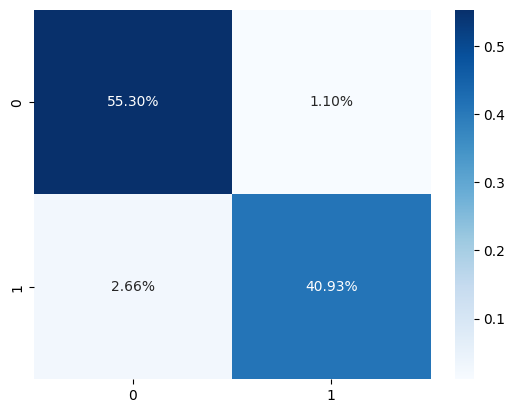

In [20]:
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.2%', cmap='Blues')

In [21]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 0.96

Micro Precision: 0.96
Micro Recall: 0.96
Micro F1-score: 0.96

Macro Precision: 0.96
Macro Recall: 0.96
Macro F1-score: 0.96

Weighted Precision: 0.96
Weighted Recall: 0.96
Weighted F1-score: 0.96

Classification Report

              precision    recall  f1-score   support

     Class 1       0.95      0.98      0.97     21979
     Class 2       0.97      0.94      0.96     16985

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



In [22]:
# Tree Visualisation
#from sklearn.tree import export_graphviz
#from IPython.display import Image
#import graphviz

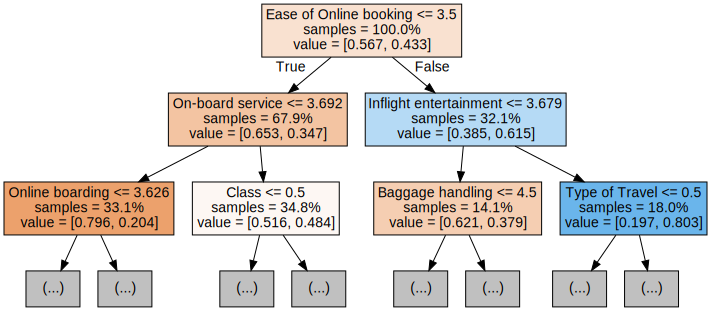

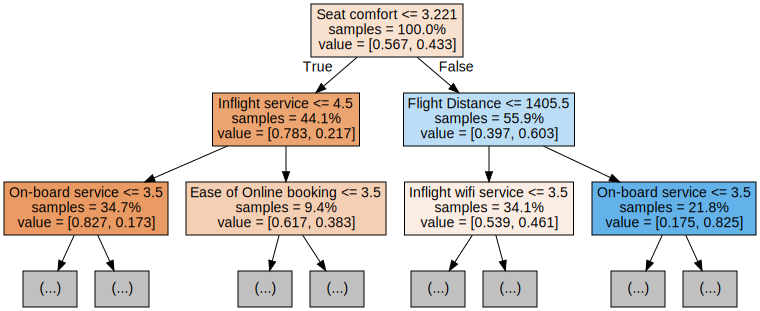

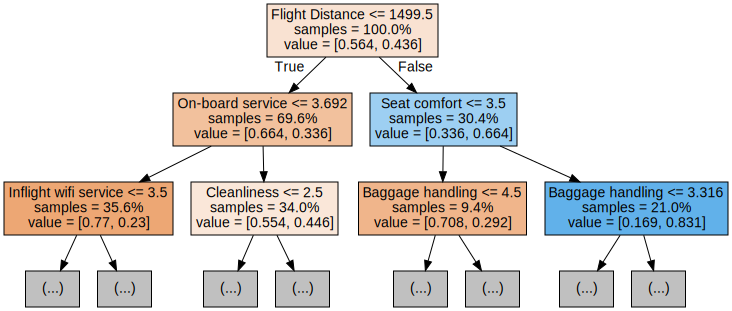

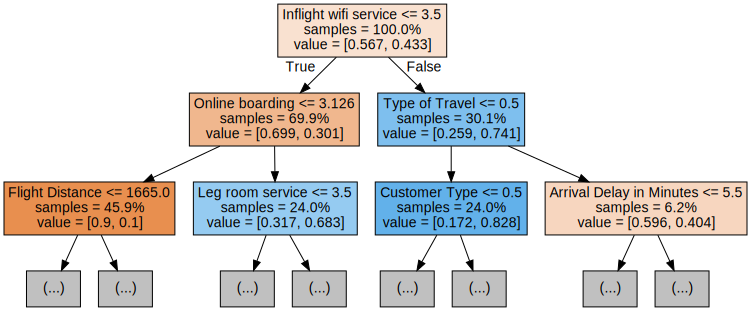

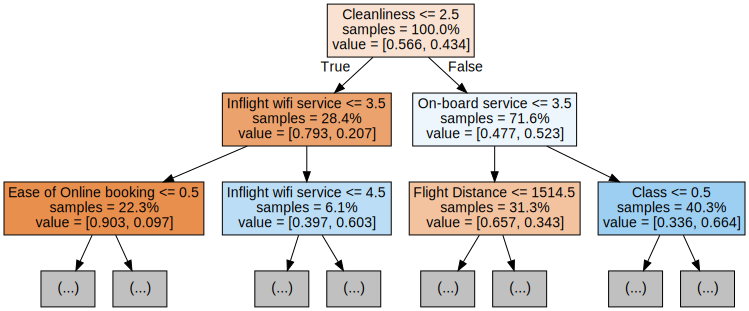

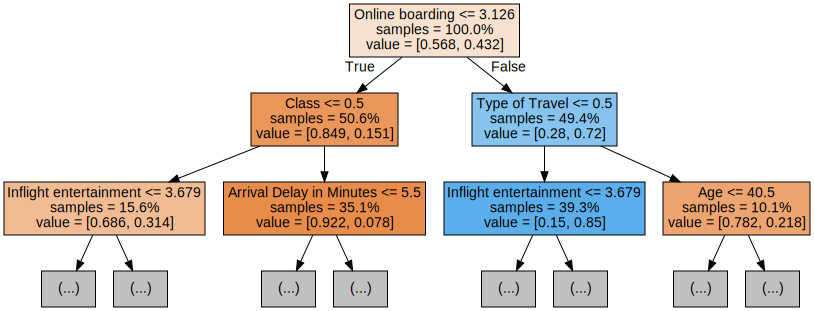

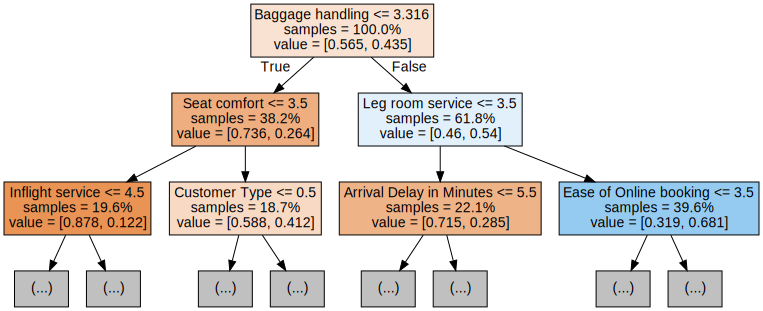

In [23]:
for i in range(7):
    tree = classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [25]:
#pip freeze > requirements.txt 

### Звіт:
1. Для проекту мною обрана тема: "ЗАДОВОЛЕННЯ ПАСАЖИРІВ АВІАКОМПАНІЇ – ПОБУДОВА МОДЕЛІ МАШИННОГО НАВЧАННЯ ДЛЯ ДОСЛІДЖЕННЯ  ФАКТОРІВ ВПЛИВУ".
2. Для проекту імпортовано датасет із Kaggle (платформи для змагань з аналітики та прогнозного моделювання).
3. Для попередньої обробки даних перевірено тип об’єктів у всіх стовпцях і всю інформацію про дані, виявлено пропущені і текстові дані. Дублікатів не виявлено.
4. Оскільки задоволеність є цільовою змінною, перевірено скільки унікальних типів задоволеності є в наборі даних: задоволених -  56428; не задоволених - 73452 пасажирів. Дослиджуватимемо фактори впливу на цільову змінну.
4. Трансформовано текстові значення в int та заповнено ячейки з пропущеними значеннями (після перевірки на пропорцію пропущених значень до загальної кількості, яка виявилась незначною, окрім Arrival Delay in Minutes (393 пропущених значення) - 'Arrival Delay in Minutes', заповнено значеннями 'Departure Delay in Minutes' після перевірки їх кореляції - 0.9656).
5. Збережено оброблений датасет - data.to_csv('processed.csv') - для візуалізації, дослідження та передачі на машинне навчання.

6. Перевірено унікальність значень по стовбчикам датасету.
7. Зроблено візуалізацію через sns.catplot парної залежності деяких даних. Ми бачимо, що ті, хто має особисту подорож, і ті, хто має ділове відрядження – майже рівний рівень незадоволених, але кількість задоволених бізнес-пасажирів візуально приблизно на 90% більше, ніж з особистою подорожжю. Пасажири старше 63 років і молодь від 9 до 22 переважно не задоволені, рівень задоволеності підвищується з 22 років, хоча незадоволених все ж більше, а від 41 до 63 років у нас набагато більше задоволених щасливих людей. Стосовно статі - майже однаково, жінки не задоволені трохи менше.
8. Візуалізовано співвідношення задоволених і не задоволених, лояльних і не лояльних пасажирів для загального розуміння.
9. Зроблено ітерацію по стовбцям для візуалізації задоволеності в залежності від різних категорій. Візуалізовано окремо залежності різними способами.
10. Зроблено загальну матрицю кореляції.
11. Виведено загальний звіт-аналіз за допомогою sweetviz та ydata_profiling.
12. Оскільки виявлено що всі дані датасету мають вплив на задоволеність пасажирів, без видалення даних передано датасет на машинне навчання - data.to_csv('processed.csv').

13. Застосовано функціональне перетворення даних, щоб привести до розподілу Gaussian. Застосовано min max scaler estimator, зроблено візуалізацію за допомогою графіків.
14. Застосовано RandomForestRegressor (accuracy = 0.9843432559183554 для тренувальної вибірки і 0.9825885926694042 для тестувальної). AUC-ROC (train) =  0.9936850538548503; AUC-ROC (oob - quality of algoritm - якість алгоритму) =  0.9938152460487512.
15. Застосовано RandomForestClassifier (аccuracy: 0.96).
16. Візуалізовано важливість ознак, що впливають на задоволеність, через функцію feat_importances, бачимо що онлайн-реєстрація є найважливішою для задоволення пасажирів. Крім того, авіакомпанія може покращити послуги Wi-Fi та взаємодію на борту для кращих результатів.Тип подорожей також має вагомий вплив.
17. Візуалізовано confusion_matrix, ми бачимо, що хибно негативні (1033=2.65%) and хибно позитивні (436=1.12%) - кількість є нормальною порівняно із загальною кількістю.
18. Через graphviz також візуалізовано дерево взаємного впливу.

